In [0]:
# mnist
# dataloader, transformation
# multilayer nn, activation function
# loss and optimizer
# training loop
# model evaluation
# GPU support

In [0]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [0]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [0]:
input_size = 784 # 28*28
hidden_size = 100
num_classes = 10

num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [0]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

In [0]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


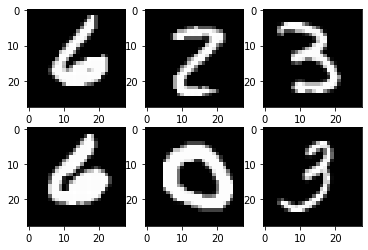

In [0]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [0]:
class NN(nn.Module):
    def __init__(self, input_size, hidden_size, num_class):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_class)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NN(input_size, hidden_size, num_classes).to(device) # GPU 사용을 위해서 .to(device)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [0]:
# train
n_total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28 인 data를
        # 100, 784 로 만들어주기
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward
        y_pred = model(images)
        loss = criterion(y_pred, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch : {epoch+1} / {num_epochs}, step : {i+1}/{n_total_step},loss : {loss.item()}')

# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        # value, index
        _, predictions = torch.max(outputs, 1) # max인 (값, index) return 한다.
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'accuracy : {acc}')

epoch : 1 / 2, step : 100/600,            loss : 0.111397884786129
epoch : 1 / 2, step : 200/600,            loss : 0.13131500780582428
epoch : 1 / 2, step : 300/600,            loss : 0.14496248960494995
epoch : 1 / 2, step : 400/600,            loss : 0.20516939461231232
epoch : 1 / 2, step : 500/600,            loss : 0.06387455761432648
epoch : 1 / 2, step : 600/600,            loss : 0.12187058478593826
epoch : 2 / 2, step : 100/600,            loss : 0.09223669022321701
epoch : 2 / 2, step : 200/600,            loss : 0.06445559859275818
epoch : 2 / 2, step : 300/600,            loss : 0.06236226111650467
epoch : 2 / 2, step : 400/600,            loss : 0.053415313363075256
epoch : 2 / 2, step : 500/600,            loss : 0.08703427016735077
epoch : 2 / 2, step : 600/600,            loss : 0.04498101770877838
accuracy : 96.68


In [0]:
outputs.shape

torch.Size([100, 10])

In [0]:
predictions

tensor([1, 4, 6, 3, 0, 3, 9, 6, 4, 5, 1, 4, 6, 3, 2, 1, 9, 1, 1, 8, 2, 9, 6, 2,
        5, 8, 7, 1, 1, 5, 4, 0, 8, 2, 0, 8, 4, 4, 8, 5, 2, 5, 6, 6, 8, 0, 8, 5,
        3, 3, 8, 8, 1, 8, 8, 7, 8, 6, 1, 1, 9, 2, 1, 1, 7, 8, 4, 9, 2, 7, 4, 9,
        3, 1, 6, 1, 2, 0, 0, 3, 1, 9, 1, 1, 9, 6, 5, 0, 6, 7, 3, 0, 0, 6, 1, 5,
        2, 3, 7, 3], device='cuda:0')